<a href="https://colab.research.google.com/github/shubavarma/DeepLearning/blob/main/LinearSep.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import tensorflow
import tensorflow.keras
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from keras.models import Sequential
from keras.layers import Dense
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score
from mlxtend.plotting import plot_decision_regions

In [2]:
# from google.colab import drive
# drive.mount('/content/drive')

In [3]:
data=pd.read_csv("/content/drive/MyDrive/Colab Notebooks/DLdatasets/4.linearsep.csv",header=None)

In [4]:
data.head()

,0,1,2
0,-0.177497,0.930496,1.0
1,1.977424,1.766155,0.0
2,1.800024,1.700343,0.0
3,-0.770837,2.359163,1.0
4,-0.308009,1.594063,1.0


In [5]:
data.shape

(100, 3)

In [6]:
data[2].value_counts()

1.0    50
0.0    50
Name: 2, dtype: int64

{'whiskers': [<matplotlib.lines.Line2D at 0x7c732d14a4d0>,
 'caps': [<matplotlib.lines.Line2D at 0x7c732d14aa10>,
 'boxes': [<matplotlib.lines.Line2D at 0x7c732d14a230>,
 'medians': [<matplotlib.lines.Line2D at 0x7c732d14af50>,
 'fliers': [<matplotlib.lines.Line2D at 0x7c732d14b1f0>,
 'means': []}

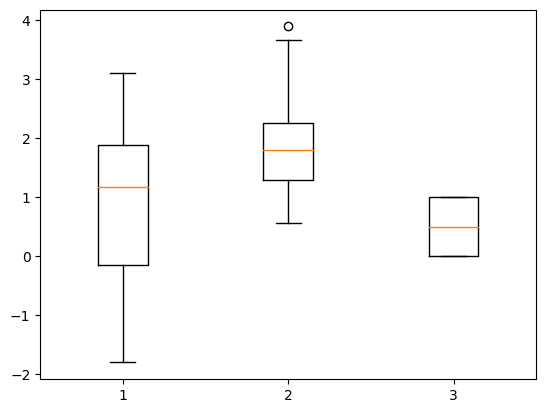

In [7]:
plt.boxplot(data)

some outliers

In [8]:
x_train,x_test,y_train,y_test=train_test_split(data[[0,1]],data[2],test_size=0.1)

In [9]:
std=StandardScaler()
x_train=std.fit_transform(x_train)
x_test=std.transform(x_test)

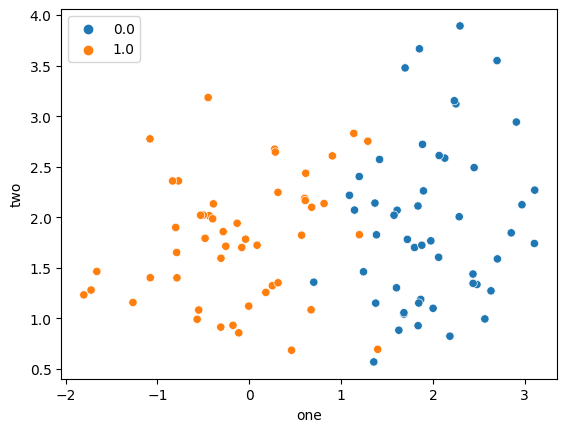

In [10]:
# code to visualize the data
data.columns = ["one","two","three"]
import seaborn as sns
sns.scatterplot(data=data, x="one",y="two",hue="three")
plt.legend()

In [11]:
model=Sequential()
model.add(Dense(11,activation="sigmoid",input_dim=2))
model.add(Dense(1,activation="sigmoid"))

In [12]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 11)                33        
                                                                 
 dense_1 (Dense)             (None, 1)                 12        
                                                                 
Total params: 45
Trainable params: 45
Non-trainable params: 0
_________________________________________________________________


In [13]:
model.compile(optimizer="sgd",loss="binary_crossentropy",metrics=["accuracy"])

In [14]:
history=model.fit(x_train,y_train,epochs=50,batch_size=1,validation_split=0.2)

Epoch 1/50
72/72 [==============================] - 3s 22ms/step - loss: 0.7011 - accuracy: 0.5278 - val_loss: 0.7104 - val_accuracy: 0.3889
Epoch 2/50
72/72 [==============================] - 1s 10ms/step - loss: 0.6488 - accuracy: 0.5278 - val_loss: 0.6515 - val_accuracy: 0.6667
Epoch 3/50
72/72 [==============================] - 1s 8ms/step - loss: 0.6227 - accuracy: 0.7917 - val_loss: 0.6205 - val_accuracy: 0.7222
Epoch 4/50
72/72 [==============================] - 1s 10ms/step - loss: 0.6026 - accuracy: 0.8472 - val_loss: 0.5935 - val_accuracy: 0.8333
Epoch 5/50
72/72 [==============================] - 1s 12ms/step - loss: 0.5826 - accuracy: 0.8333 - val_loss: 0.5664 - val_accuracy: 0.9444
Epoch 6/50
72/72 [==============================] - 0s 6ms/step - loss: 0.5653 - accuracy: 0.9306 - val_loss: 0.5503 - val_accuracy: 0.9444
Epoch 7/50
72/72 [==============================] - 0s 4ms/step - loss: 0.5470 - accuracy: 0.9167 - val_loss: 0.5297 - val_accuracy: 1.0000
Epoch 8/50
72/72

In [15]:
predicted=np.where(model.predict(x_test)>0.5,1,0)

1/1 [==============================] - 0s 280ms/step


In [16]:
accuracy_score(y_test,predicted)

0.9

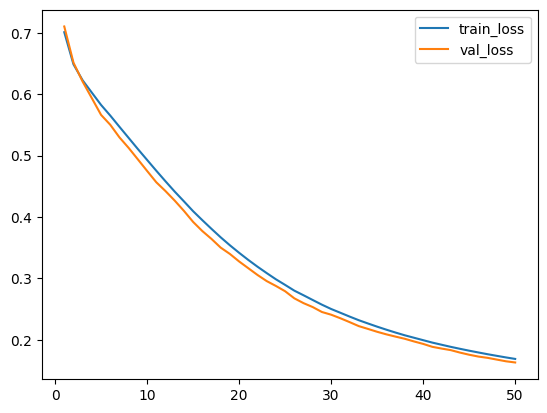

In [17]:
plt.plot(range(1,51),history.history["loss"],label="train_loss")
plt.plot(range(1,51),history.history["val_loss"],label="val_loss")
plt.legend()

In [18]:
import mlxtend

In [19]:
from mlxtend.plotting import plot_decision_regions

In [20]:
accuracy_score(y_train,np.where(model.predict(x_train)>0.5,1,0))

3/3 [==============================] - 0s 4ms/step


0.9666666666666667

9600/9600 [==============================] - 32s 3ms/step


<Axes: >

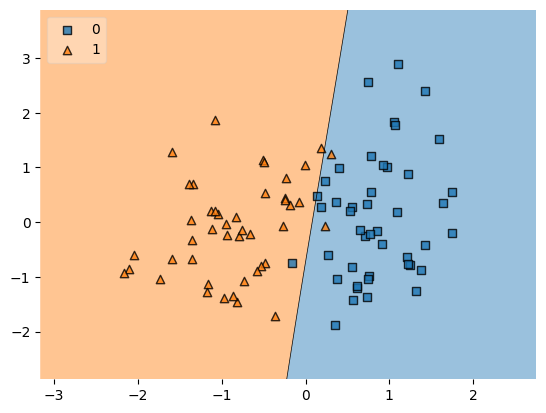

In [21]:
plot_decision_regions(x_train,y_train.values.astype(int),clf=model,legend=2)

9600/9600 [==============================] - 15s 2ms/step


<Axes: >

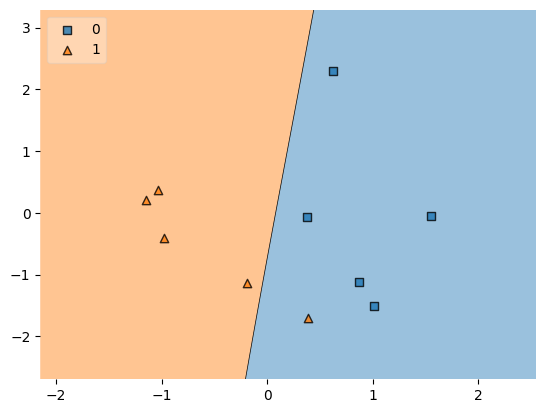

In [22]:
plot_decision_regions(x_test,y_test.values.astype(int),clf=model,legend=2)